**Department of Mathematics <br>
College of Arts and Sciences, Howard University <br>
MATH 014 (01) – Introduction to Data Science <br> 
Project 2 – Part 2**

**Student Name:** Halia Benn <br>
**Student ID:** 004001244 <br> 
**Due Date: 03-21-25**

---

#### **INSTRUCTIONS**
Follow the section breakdown below to visualize your dataset. Answer all prompts using **code and markdown explanations**. Use **Matplotlib and Seaborn** to create your visualizations.
*Academic integrity applies. Work must be your own.*

---

#### Preparing the data and Python libraries

In [7]:
# Pandas is a Python library for data manipulation and analysis, helpful for handling tabular, structured data 
import pandas as pd # import as user-defined "pd"
print('Pandas imported as pd.')

# Numpy is a Python library primarily for numarical calculations
import numpy as np  # import as user-defined "np"
print('Numpy imported as np.')

# Matplotlib is a Python library for 2D and 3D plots, useful for presentations 
# pyplot is an interface that allows the user to create, categorize, display plots
import matplotlib.pyplot as plt # import as user-defined "plt"
print('Matplotlib imported as plt.')

# Seaborn is an extension of Matplotlib that allows for more advanced data visualization
import seaborn as sns # import as user-defined "sns"
print('Matplotlib imported as sns.')

Pandas imported as pd.
Numpy imported as np.
Matplotlib imported as plt.
Matplotlib imported as sns.


In [9]:
# Load the dataset with the built-in function pd.read_csv, calling the file by name
df = pd.read_csv('temperature_cleaned.csv') 
print('Dataset "temperature_cleaned.csv" loaded.')
 
df # print the first and last few rows for reference

Dataset "temperature_cleaned.csv" loaded.


,Unnamed: 0,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct,Population Size,Total C02 Emissions (tons)
0,0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,Medium,4.937474e+09
1,1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,Small,5.153489e+08
2,2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,Medium,1.235085e+09
3,3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7,Medium,1.925405e+09
4,4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4,Small,6.948434e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2019,India,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2,Large,1.086416e+10
996,996,2000,UK,21.8,10.0,2.2,1273,876123161,14.9,14,30.1,Medium,8.761232e+09
997,997,2019,Argentina,23.8,8.9,4.7,891,1120533308,25.9,10,46.5,Large,9.972746e+09
998,998,2016,Australia,21.0,14.9,3.1,1136,380662109,24.5,3,44.5,Medium,5.671865e+09


---

#### **SECTION I: INDIVIDUAL, COMPARATIVE AND GROUPED VISUALIZATIONS** <br>

1. Create **at least two** of the following:
    * A **histogram** or **boxplot** for a numerical column (e.g., income, score, age, etc.).
    * A **bar chart** for a categorical column (e.g., region, department, gender, etc.).
    * A **count plot** showing frequency distribution of a key variable. <br>

    **Explain:** What does this visualization reveal about the distribution or spread of values?


#### A histogram can help visualize the frequency of an individual numerical variable in the dataset

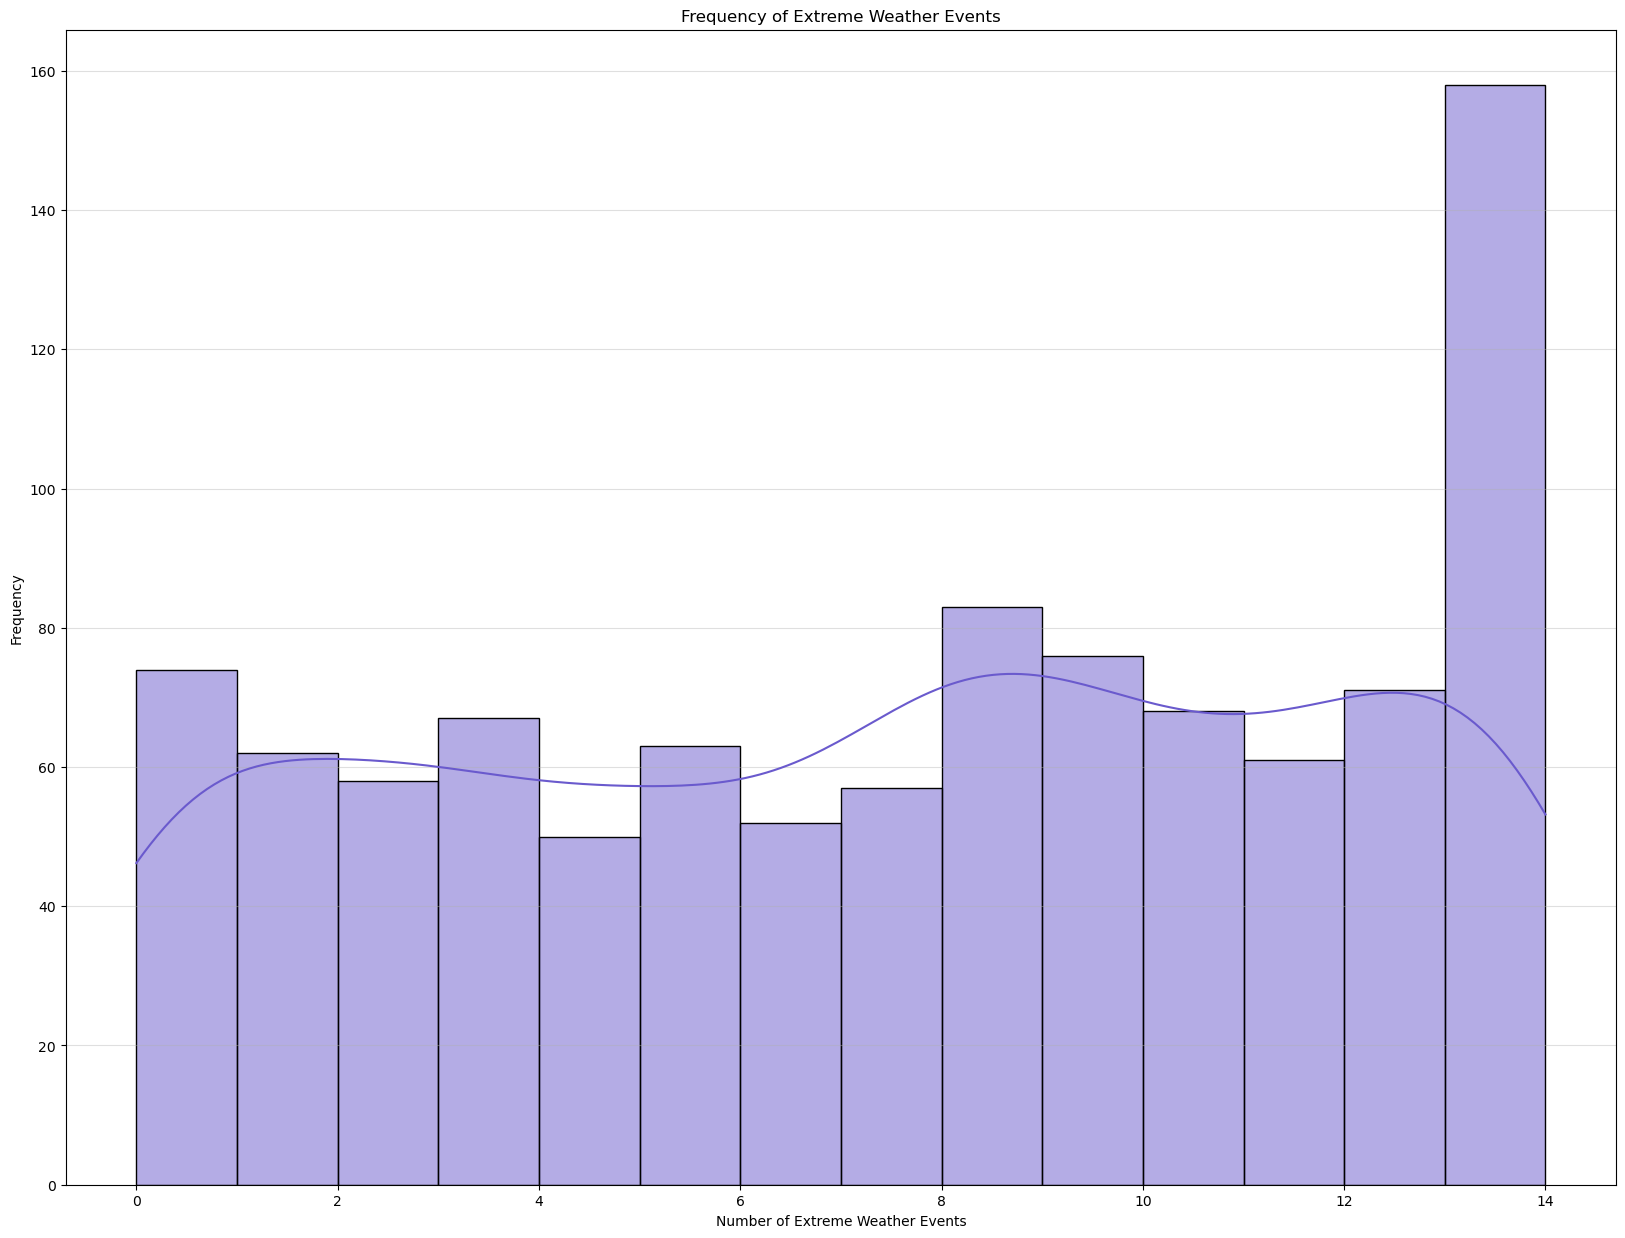

In [14]:
# plt.figure sets the size of the graph
plt.figure(figsize=(20, 15)) # make the graph big enough to analyze

#plt.hist creates a histogram of the data. A data source and x-axis must be set for it to generate 
sns.histplot(data=df, x='Extreme_Weather_Events',color='slateblue', edgecolor='black', bins=14, kde=True) # color and edgecolor can optionally be altered. 
# bins categorizes the data by intervals or places them into certain "bins". bins = 14 will allow an analysis of each Extreme Weather Events value

plt.title('Frequency of Extreme Weather Events') # plt.title sets a title for the graph
plt.xlabel('Number of Extreme Weather Events') # plt.xlabel sets a label for the x-axis
plt.ylabel('Frequency') # plt.ylabel sets a label for the y-axis

# plt.grid creates lines for reference
plt.grid(axis='y', alpha=0.4) # make them from the y-axis and semi-transparent 

plt.savefig("proj2_histogram.png") # use .savefig to export the figure to a png image file
    
plt.show() # display the graph

**Insight:**
This graph shows the number of data entries (Frequency) corresponding to the number of extreme weather events that occured within the year that the data entry was recorded. The highest interval of Extreme Weather Events (13-14) surprisingly has the highest frequency of data entries (around 155). Other than that, the rest of the data tends to fall relatively even througout the other intervals, between 50 and 85 data entries. Based on the annotation, the 13-14 interval seems to be an outlier.
**This means that of the intervals of Extreme Weather Events that are possible, 13-14 abnormally has the highest frequency among the data entries**. <br> 
This is more of a statistical analyis than it is very helpful for a real-world understanding of the data. 

---

#### A barplot can help visualize the a categorical variable, such as Country 

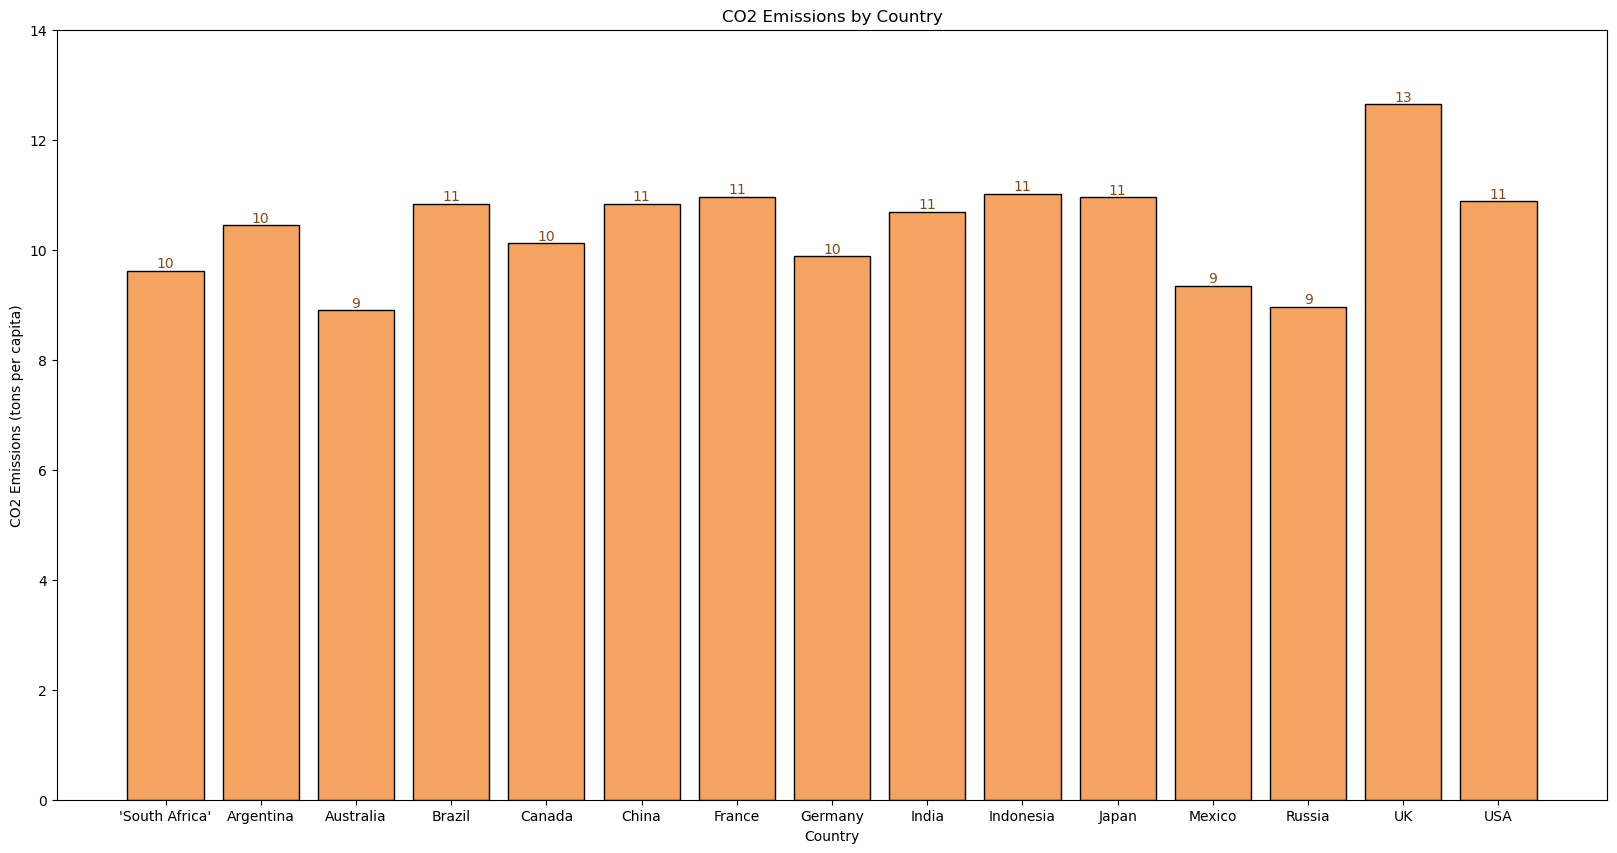

In [16]:
# create a user-defined variable and use .groupby to  filter the data 
cc = df.groupby('Country')['CO2_Emissions_tons_per_capita'].mean().reset_index() # .reset_index to reset the index

fig, ax = plt.subplots(figsize=(20,10)) # use the plt.subplots function and set a size for the graph
# create a user-defined variable and create a graph with the ax.bar function. ax.bar stands for axes.bar
bar_cont = ax.bar(cc['Country'],cc['CO2_Emissions_tons_per_capita'], color='sandybrown', edgecolor='black') # set x, y, color, and edgecolor
ax.set(ylabel='CO2 Emissions (tons per capita)', xlabel='Country', title='CO2 Emissions by Country', ylim=(0, 14)) # label the graph
ax.bar_label(bar_cont, fmt='{:,.0f}', color='saddlebrown') # use ax.bar_label to annotate the graph

plt.savefig("proj2_bar1.png")

plt.show()

**Insight:** 
The level of CO2 emissions from each country seems to be pretty close to the rest. This lack of variability between them could be due to how the temperature data for each country has been condensed across multiple entries from different time periods. 

---

#### Looking into specific years may give a better comparison for the CO2 emissions between different countries than the average of each country over the span of 23 years. A subplot can help place multiple of these years in context with each other.

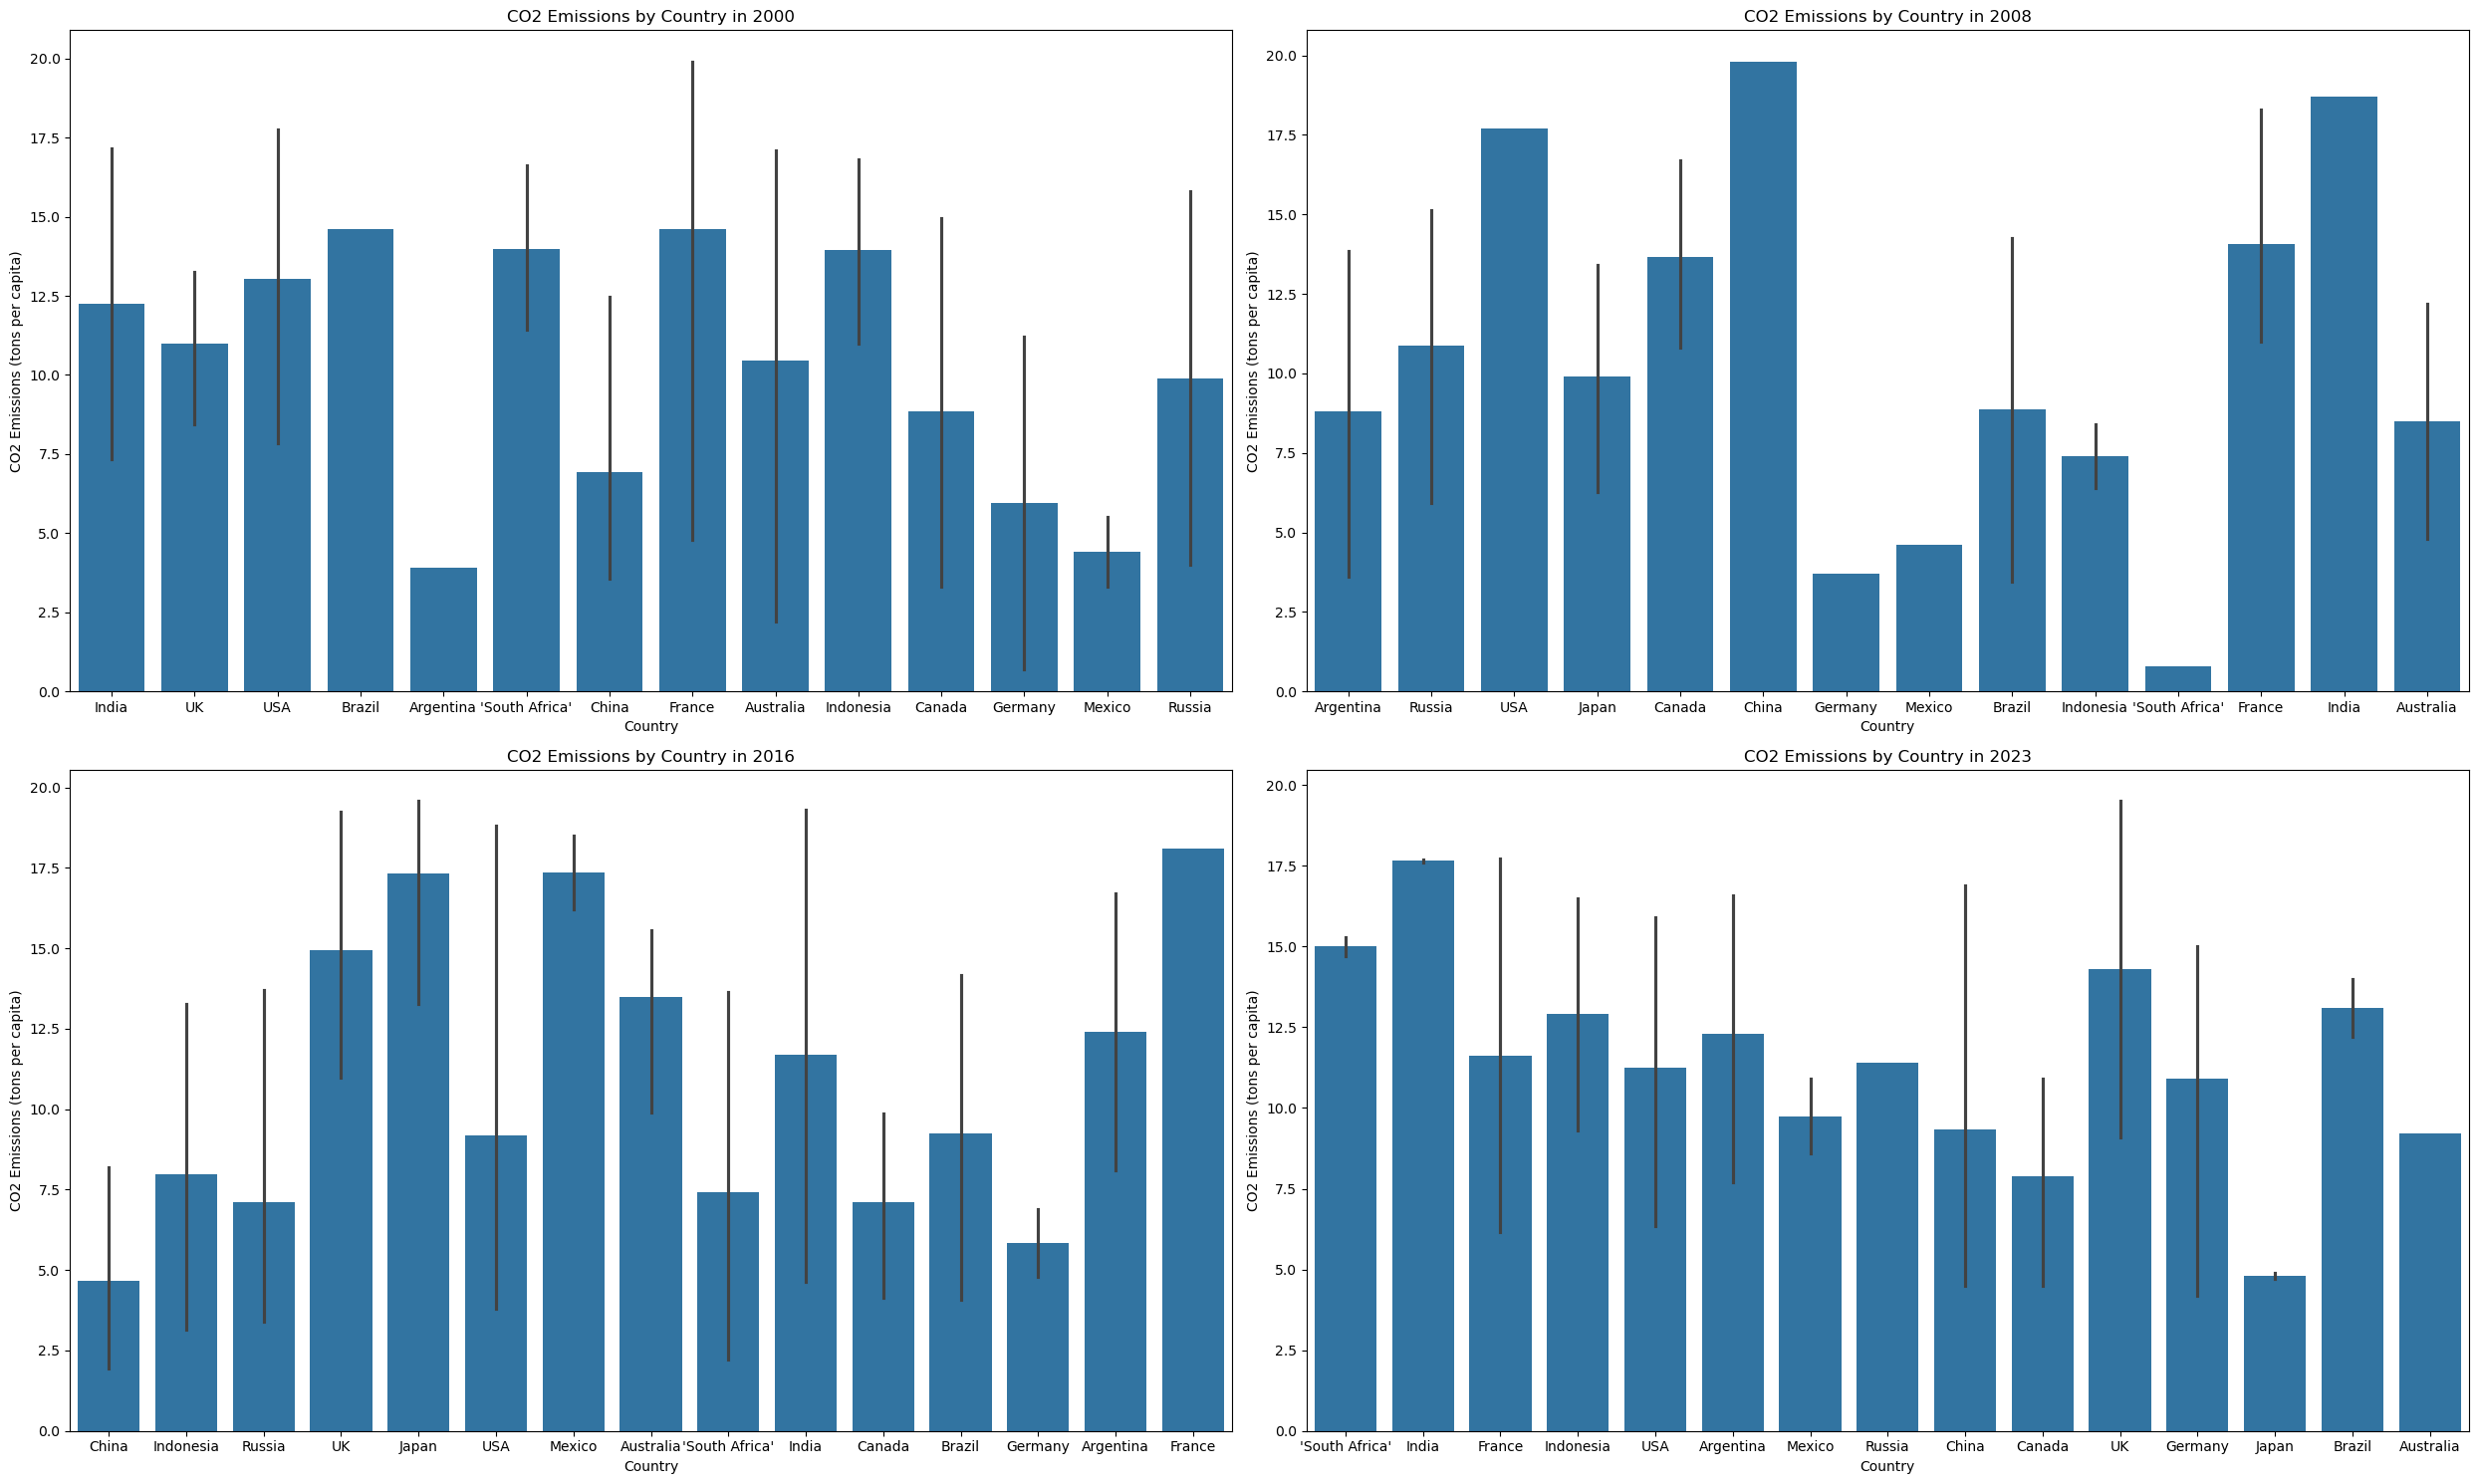

In [20]:
 # use filter code to focus on data from various years: 2000, 2008, 2016, and 2023
df_2000 = df[df['Year'] == 2000].copy() 
df_2008 = df[df['Year'] == 2008].copy() 
df_2016 = df[df['Year'] == 2016].copy() 
df_2023 = df[df['Year'] == 2023].copy() 


# use .subplots to create subplots (2 rows, 2 columns) to show graphs alongside each other
fig, axes = plt.subplots(2, 2, figsize=(25, 15))

# Plot 1: Barplot of CO2 Emissions by Country in the year 2000
sns.barplot(x='Country',y='CO2_Emissions_tons_per_capita', data=df_2000, ax=axes[0, 0]) 
axes[0, 0].set_title('CO2 Emissions by Country in 2000')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('CO2 Emissions (tons per capita)')


# Plot 2: Barplot of CO2 Emissions by Country in the year 2008
sns.barplot(x='Country',y='CO2_Emissions_tons_per_capita', data=df_2008, ax=axes[0, 1])
axes[0, 1].set_title('CO2 Emissions by Country in 2008')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('CO2 Emissions (tons per capita)')


# Plot 3: Barplot of CO2 Emissions by Country in the year 2016
sns.barplot(x='Country',y='CO2_Emissions_tons_per_capita', data=df_2016, ax=axes[1, 0])
axes[1, 0].set_title('CO2 Emissions by Country in 2016')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('CO2 Emissions (tons per capita)')


# Plot 4: Barplot of CO2 Emissions by Country in the year 2023
sns.barplot(x='Country',y='CO2_Emissions_tons_per_capita', data=df_2023, ax=axes[1, 1])
axes[1, 1].set_title('CO2 Emissions by Country in 2023')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('CO2 Emissions (tons per capita)')


# Adjust layout for better spacing
plt.tight_layout() 

plt.savefig("proj2_bar2.png")

plt.show()

**Insight:** 
Here, there is much more variability between the CO2 emissions of each country. It shows not only that there's more difference between the countries, but that each country has produced significant changes in CO2 emissions through the years. One of the most interesting progressions is South Africa, that hit an all-time low in 2008 around 1 ton per capita, in comparison to 15 tons per capita in 2023. 

---

2. Use .groupby() and visualization to compare across categories:
    * A **bar plot** or **line plot** comparing average or total values across categories. <br>
    
**Explain:** What patterns or differences do you observe among the groups?

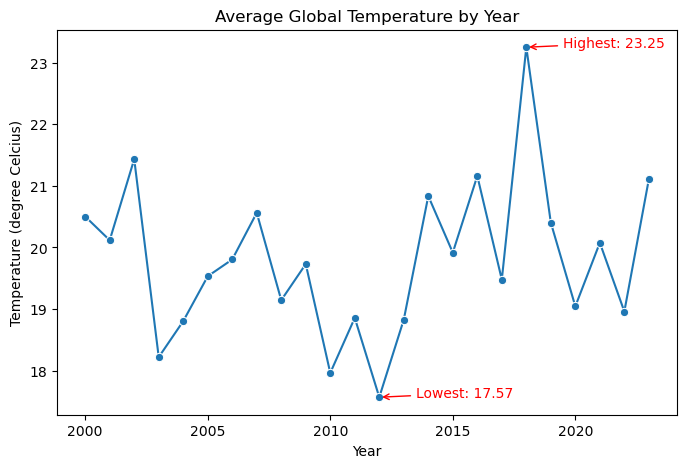

In [24]:
# create a user-defined variable titled Temp_by_Year
Temp_by_Year = df.groupby('Year',observed=False)['Avg_Temperature_degC'].mean().reset_index()
# use .groupby to filter the temperature by year 
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year',y='Avg_Temperature_degC', data=Temp_by_Year, marker='o') # use .plot to make a line plot of the variable. annotate with markers
plt.title('Average Global Temperature by Year') 
plt.xlabel('Year')
plt.ylabel('Temperature (degree Celcius)')

max_temp = Temp_by_Year.loc[Temp_by_Year['Avg_Temperature_degC'].idxmax()] # idxmin finds the index where a column reaches its highest value
plt.annotate(
    f"Highest: {max_temp['Avg_Temperature_degC']:.2f}",
    xy=(max_temp['Year'],max_temp['Avg_Temperature_degC']),
    xytext=(max_temp['Year'] + 1.5, max_temp['Avg_Temperature_degC']),
    arrowprops=dict(arrowstyle="->",color='red'),
    fontsize=10,
    color='red'

)

min_temp = Temp_by_Year.loc[Temp_by_Year['Avg_Temperature_degC'].idxmin()] # .idxmin finds the index where a column reaches its lowest value
plt.annotate(
    f"Lowest: {min_temp['Avg_Temperature_degC']:.2f}",
    xy=(min_temp['Year'],min_temp['Avg_Temperature_degC']),
    xytext=(min_temp['Year'] + 1.5, min_temp['Avg_Temperature_degC']),
    arrowprops=dict(arrowstyle="->",color='red'),
    fontsize=10,
    color='red'

)

plt.savefig("proj2_line1.png")

plt.show()

**Insight:** 
This graph shows the temperatures of all countries combined over the years, on a global scale. It seems that the lowest temperature of the world was around the year 2012, and the highest around 2019. I am curious to know the cause for such a drastic difference between them. Where the graph ends, there is an upward trend into the future. 

---

#### To get more specific insight, we can create a subplot that puts the temperature trends of certain countries in comparison. To test if certain regions have similar patterns, we will create color-coded pairs from 10 countries. They will be paired by their relative closeness on a world map.

Start with creating the variables for individual countries:

In [30]:
# filter data to get the temperature by year for South Africa
df_SA = df[df['Country'] == "'South Africa'"].copy() # filter by country
Temp_SA = df_SA.groupby('Year')['Avg_Temperature_degC'].mean() # additionally filter the temperature by year

# filter data to get the temperature by year for India
df_IN = df[df['Country'] == "India"].copy()
Temp_IN = df_IN.groupby('Year')['Avg_Temperature_degC'].mean() 

# filter data to get the temperature by year for Mexico
df_MX = df[df['Country'] == "Mexico"].copy()
Temp_MX = df_MX.groupby('Year')['Avg_Temperature_degC'].mean() 

# filter data to get the temperature by year for Canada
df_CAN = df[df['Country'] == "Canada"].copy()
Temp_CAN= df_CAN.groupby('Year')['Avg_Temperature_degC'].mean() 

# filter data to get the temperature by year for Russia
df_R = df[df['Country'] == "Russia"].copy()
Temp_R = df_R.groupby('Year')['Avg_Temperature_degC'].mean()

# filter data to get the temperature by year for China
df_CN = df[df['Country'] == "China"].copy()
Temp_CN = df_CN.groupby('Year')['Avg_Temperature_degC'].mean()

# filter data to get the temperature by year for Brazil
df_BZL = df[df['Country'] == "Brazil"].copy()
Temp_BZL = df_BZL.groupby('Year')['Avg_Temperature_degC'].mean()

# filter data to get the temperature by year for Argentina 
df_AR = df[df['Country'] == "Argentina"].copy()
Temp_AR = df_AR.groupby('Year')['Avg_Temperature_degC'].mean()

# filter data to get the temperature by year for Australia
df_AU = df[df['Country'] == "Australia"].copy()
Temp_AU = df_AU.groupby('Year')['Avg_Temperature_degC'].mean()

# filter data to get the temperature by year for Indonesia
df_INDO = df[df['Country'] == "Indonesia"].copy()
Temp_INDO = df_INDO.groupby('Year')['Avg_Temperature_degC'].mean()

Next, create subplots for each variable to place them in context with each other:

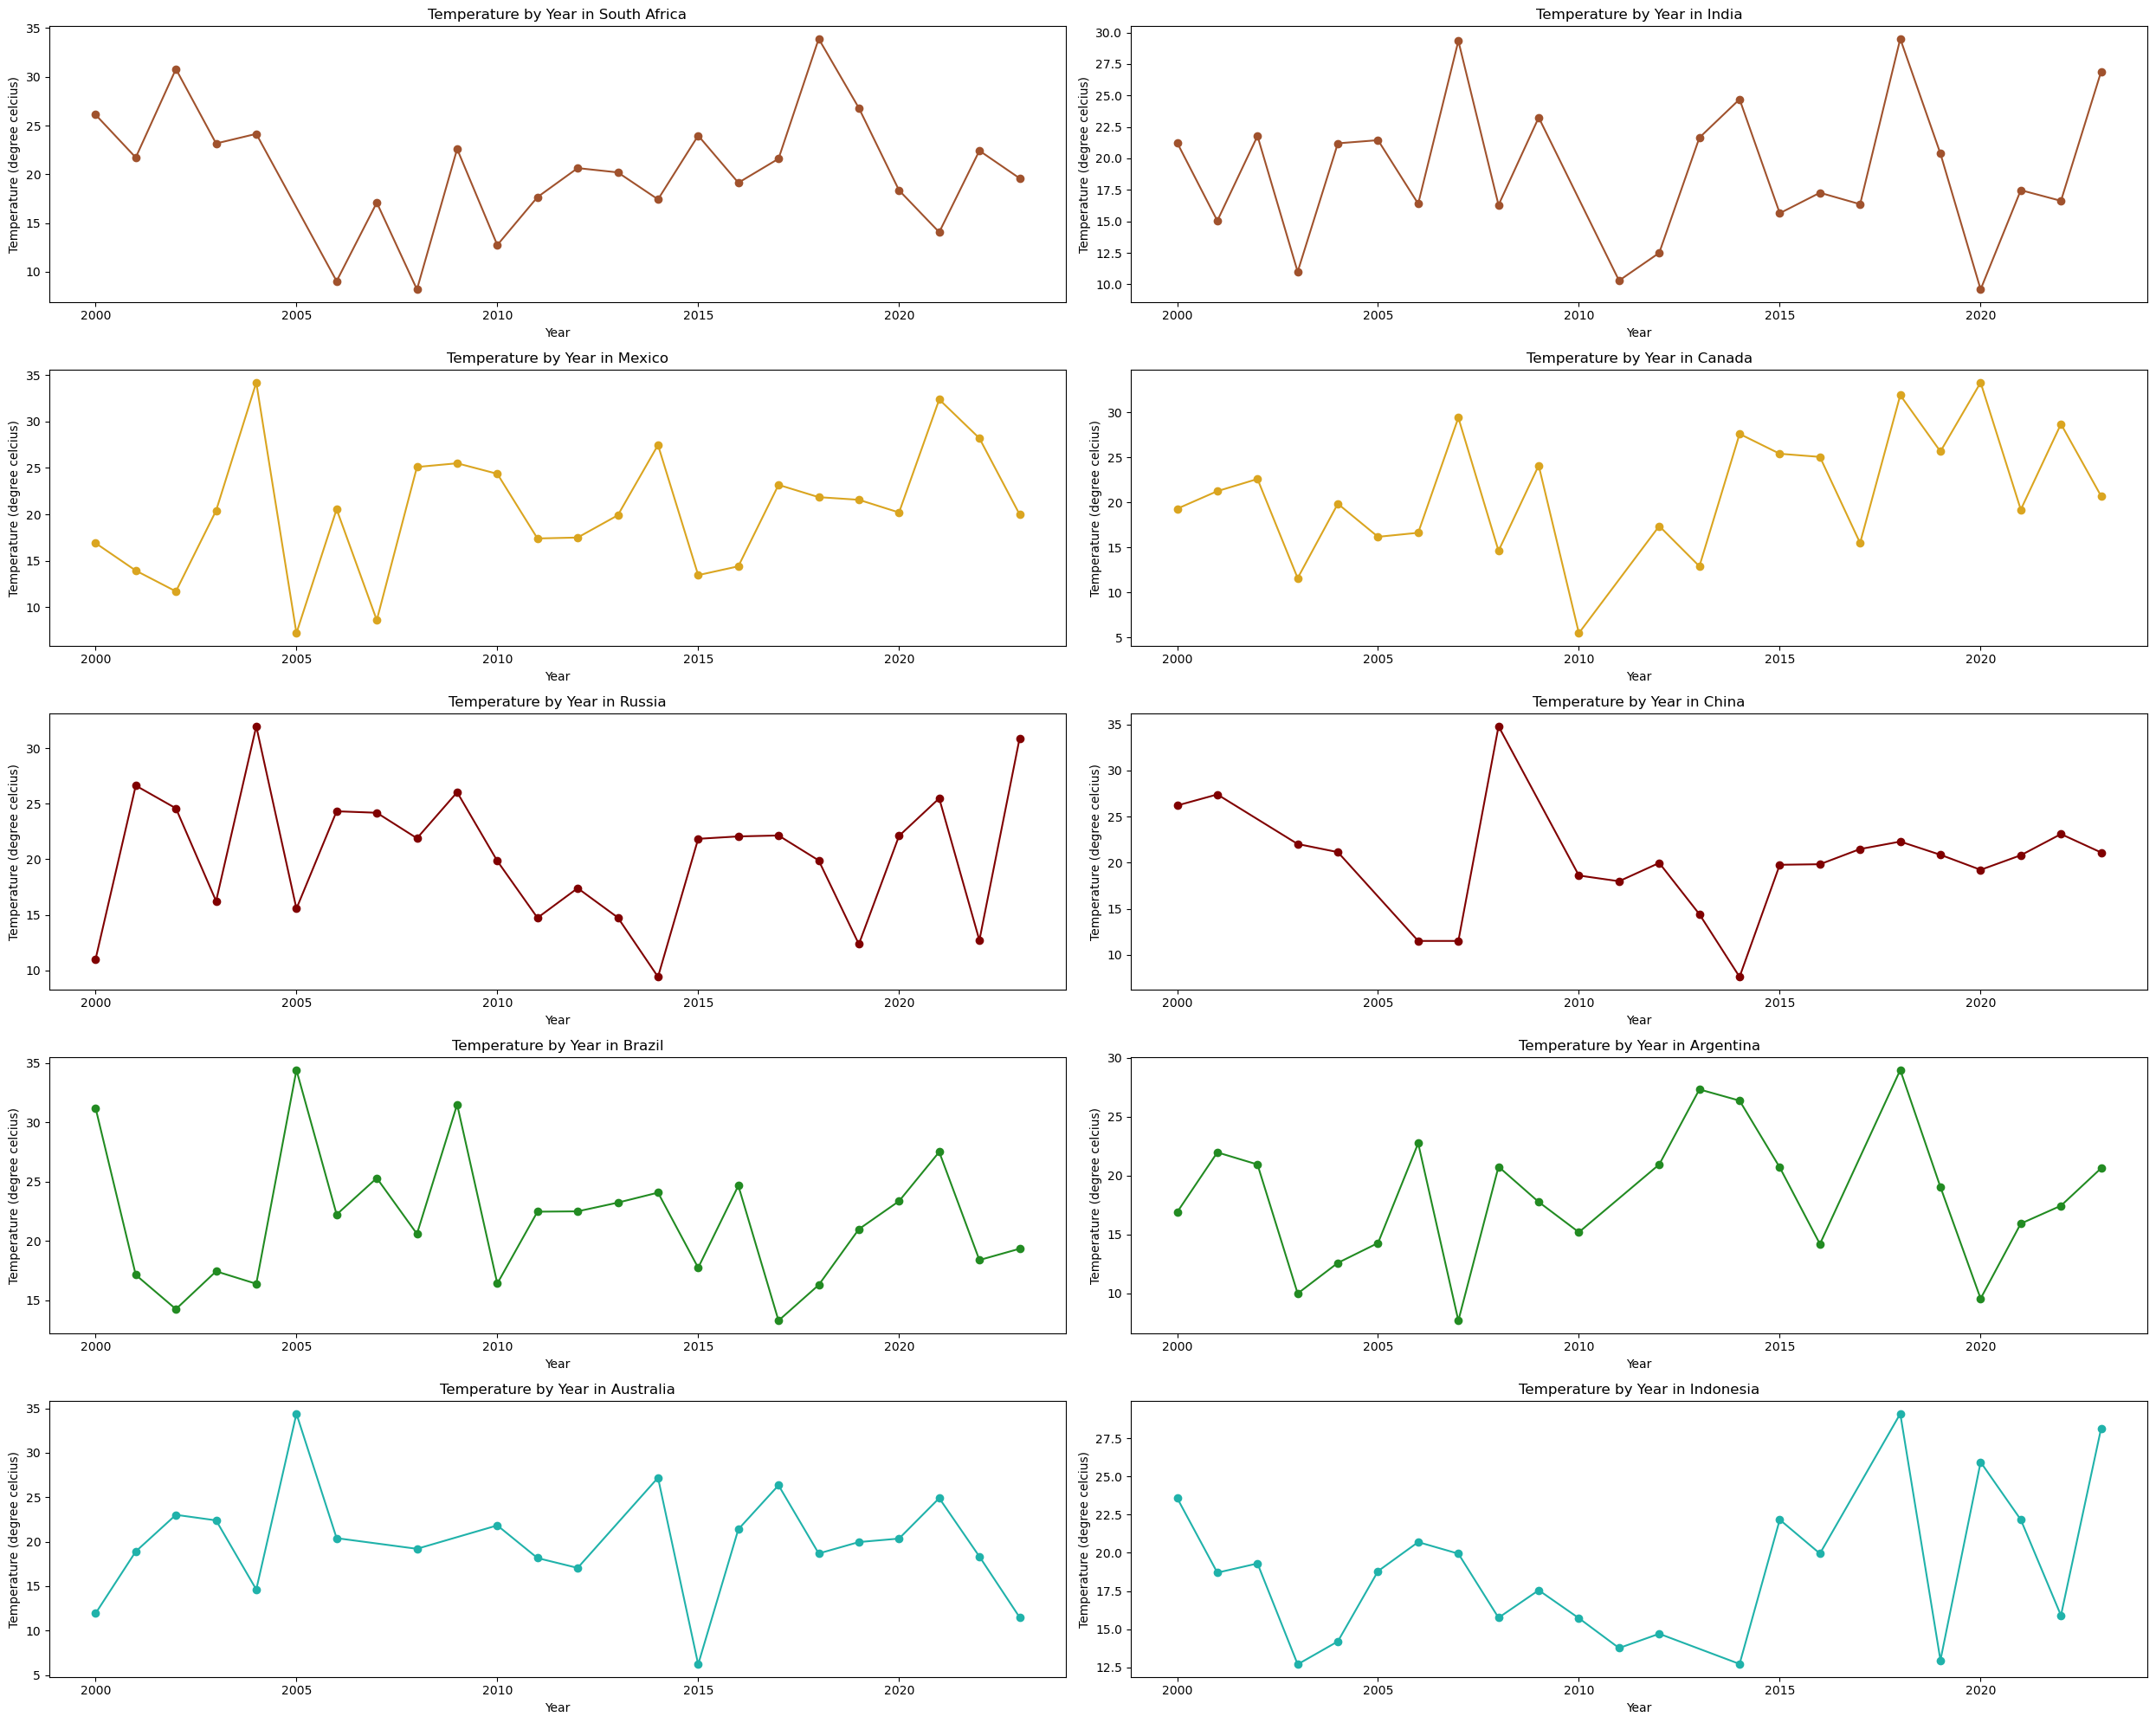

In [108]:
# create subplots (5 rows, 2 columns) to compare different countries 
fig, axes = plt.subplots(5, 2, figsize=(25, 20))

# Plot 1: Line plot of Temperature by Year in South Africa
Temp_SA.plot(kind='line', ax=axes[0, 0], marker='o', color='sienna') # group 1 color: sienna 
axes[0, 0].set_title('Temperature by Year in South Africa')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Temperature (degree celcius)')


# Plot 2: Line plot of Temperature by Year in India
Temp_IN.plot(kind='line', ax=axes[0, 1], marker='o', color='sienna') # group 1 color: sienna 
axes[0, 1].set_title('Temperature by Year in India')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Temperature (degree celcius)')


# Plot 3: Line plot of Temperature by Year in Mexico
Temp_MX.plot(kind='line', ax=axes[1, 0], marker='o', color='goldenrod') # group 2 color: goldrenrod 
axes[1, 0].set_title('Temperature by Year in Mexico')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Temperature (degree celcius)')


# Plot 4: Line plot of Temperature by Year in Canada
Temp_CAN.plot(kind='line', ax=axes[1, 1], marker='o', color='goldenrod') # group 2 color: goldrenrod 
axes[1, 1].set_title('Temperature by Year in Canada')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Temperature (degree celcius)')

# Plot 5: Line plot of Temperature by Year in Russia
Temp_R.plot(kind='line', ax=axes[2, 0], marker='o', color='maroon') # group 3 color: maroon 
axes[2, 0].set_title('Temperature by Year in Russia')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Temperature (degree celcius)')

# Plot 4: Line plot of Temperature by Year in China
Temp_CN.plot(kind='line', ax=axes[2, 1],marker='o', color='maroon') # group 3 color: maroon 
axes[2, 1].set_title('Temperature by Year in China')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Temperature (degree celcius)')

# Plot 4: Line plot of Temperature by Year in Brazil
Temp_BZL.plot(kind='line', ax=axes[3, 0],marker='o', color='forestgreen') # group 4 color: forestgreen 
axes[3, 0].set_title('Temperature by Year in Brazil')
axes[3, 0].set_xlabel('Year')
axes[3, 0].set_ylabel('Temperature (degree celcius)')

# Plot 4: Line plot of Temperature by Year in Argentina
Temp_AR.plot(kind='line', ax=axes[3, 1],marker='o', color='forestgreen') # group 4 color: forestgreen 
axes[3, 1].set_title('Temperature by Year in Argentina')
axes[3, 1].set_xlabel('Year')
axes[3, 1].set_ylabel('Temperature (degree celcius)')

# Plot 4: Line plot of Temperature by Year in Australia
Temp_AU.plot(kind='line', ax=axes[4, 0],marker='o', color='lightseagreen') # group 5 color: lightseagreen 
axes[4, 0].set_title('Temperature by Year in Australia')
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('Temperature (degree celcius)')

# Plot 4: Line plot of Temperature by Year in Indonesia
Temp_INDO.plot(kind='line', ax=axes[4, 1],marker='o', color='lightseagreen') # group 5 color: lightseagreen 
axes[4, 1].set_title('Temperature by Year in Indonesia')
axes[4, 1].set_xlabel('Year')
axes[4, 1].set_ylabel('Temperature (degree celcius)')


# use plt.tight_layout to adjust the layout for better spacing
plt.tight_layout() 

plt.savefig("proj2_line2.png")

plt.show()

**Insight:**
While each graph looks relatively similar to one another, I would argue that those color-coded with one another have the most similarity. This is at least made true by the lack of contradiction between them, where if there is a spike, the paired graph does not typically have an inverted dip in the same location. Additionally, the characteristics of one graph may be emphasized or intensified uniquely by its pair. **This gives us a sense of how temperature trends in certain areas of the world relatively resemble each other, even with the individuality of the unique climate conditions of each country**.

---

#### **Section I Summary:**
These visualizations help reveal the distribution of specific variables throughout the dataset. Filtering the data additionally gives more specific insight into these patterns.

---

#### **SECTION II: RELATIONSHIP VISUALIZATIONS** <br>
Use visualizations that reveal relationships between two numerical or mixed variables:
* A scatter plot.
* A heatmap of correlations. <br>

**Explain**: Do you observe trends, correlations, or outliers? <br>

NOTE:
* Every visualization must include **clear titles, axis labels, annotations, and interpretation**.
* Use **clean formatting** and readable markdown explanations.
* You may include additional visualizations if they enhance your analysis.


---

#### It is helpful to start with a correlation matrix to identify significant relationships in the data

For more specific analysis, I will choose a single country to analyze: South Africa

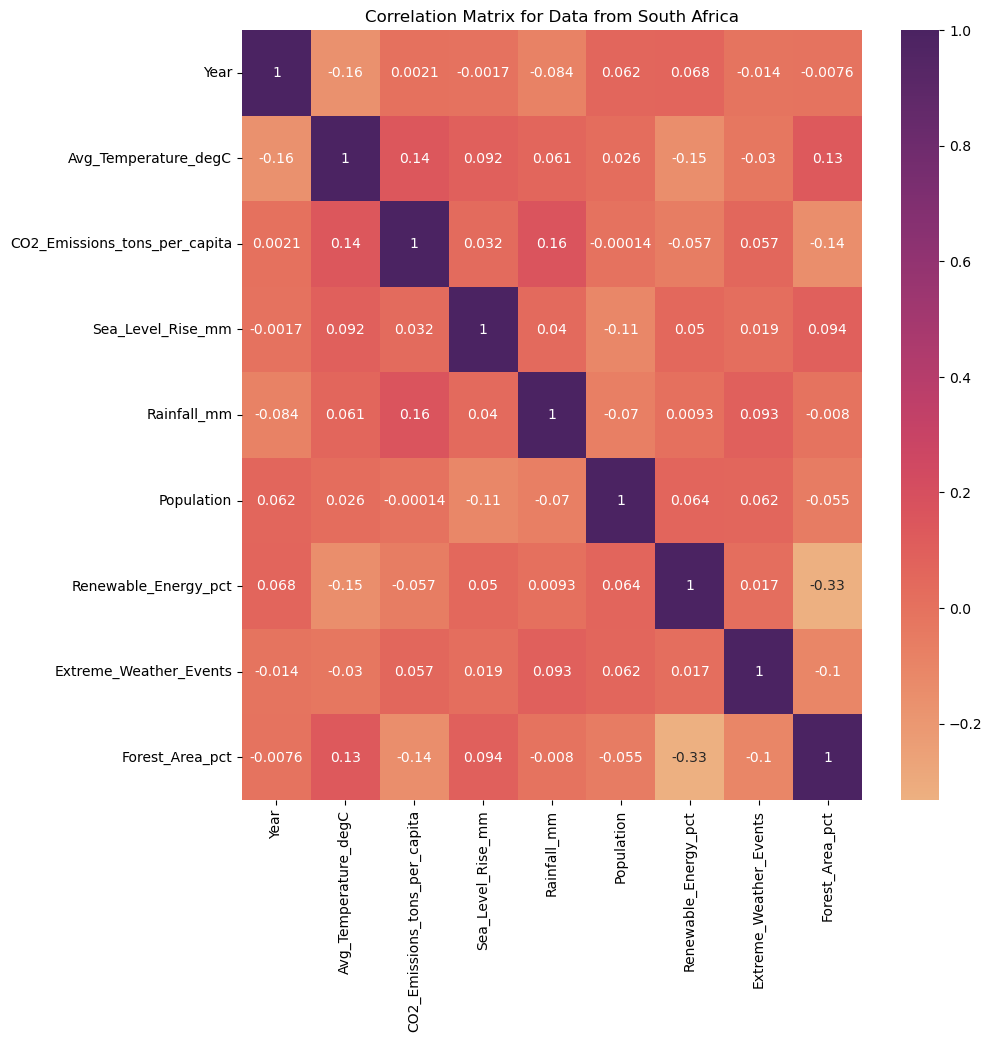

In [42]:
df_sa = df[df['Country'] == "'South Africa'"] # filter the data to be from South Africa

plt.figure(figsize=(10,10)) 

# use sns.heatmap and .corr() to create a heatmap for a correlation matrix of each column
sns.heatmap(df_sa[['Year','Avg_Temperature_degC','CO2_Emissions_tons_per_capita','Sea_Level_Rise_mm','Rainfall_mm','Population','Renewable_Energy_pct','Extreme_Weather_Events','Forest_Area_pct']].corr(), annot=True, cmap='flare')
plt.title("Correlation Matrix for Data from South Africa") 

plt.savefig("proj2_heatmap1.png")

plt.show()

**Interpretation:** 
* There is relatively weak correlation between all of the columns
* The strongest **positive** correlations are:
    * CO2_Emissions_tons_per_capita and Rainfall_mm **(0.16)**
    * CO2_Emissions_tons_per_capita and Avg_Temperature_degC **(0.14)**
    * Forest_Area_pct and Avg_Temperature_degC **(0.13)**
* The strongest **negative** correlations are:
    * Renewable_Energy_pct and Forest_Area_pct **(-0.33)**
    * Year and Avg_Temperature_degC **(-0.16)**
    * Renewable_Energy_pct and Avg_Temperature_degC **(-0.15)**
    * Forest_Area_pct and CO2_Emissions_tons_per_capita **(0.14)** <br>

**Why it matters:**
* **This gives us a sense of which correlations to focus on in our further investigation**
* It also gives a general sense of of how the variables are interacting with each other

---

From this, we can choose to analyze the relationship between renewable energy and forest area:

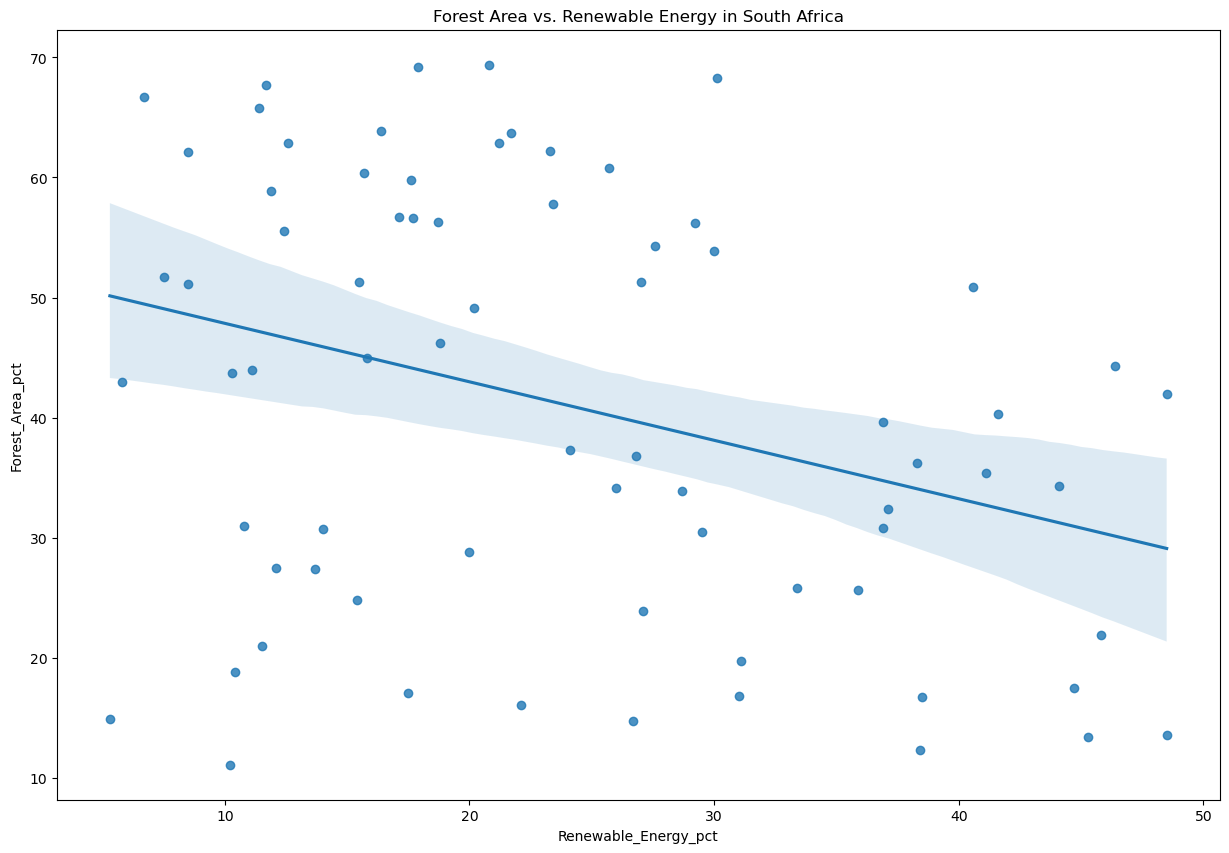

In [47]:
plt.figure(figsize=(15,10))

# sns.regplot uses a logistic model to clearly define and visualize the trend of the distribution
sns.regplot(x='Renewable_Energy_pct',y='Forest_Area_pct', data=df_sa) # set x, y, and the data source
plt.title("Forest Area vs. Renewable Energy in South Africa") 

plt.savefig("proj2_scatter1.png")

plt.show()

**Interpretation:**
* There is a slight downward trend of the data points
* The data points are widely distributed and do not follow a linear trend

**Why it matters:**
* **There is a slight correlation between forest area and renewable energy. The lack of linearity could indicate that the variables more indirectly affect each other.**
* **The downward trend indicates inverse variation.** This means that when one increases, the other decreases.
* For example, the harvesting of natural materials or the need for space to accomodate technological advancement could cause a decrease in forest area and a simultaneous increase in renewable energy.

---

My groupmate, Chiara, engineered a feature that creates a column with a binary that could enhance our visualization. Lets implement this:

In [52]:
# Using my groupmate Chiara's code for feature engineering:
df_grouped = df.groupby(["Year", "Country"]).agg({"Avg_Temperature_degC" : 'mean',
                                                      "CO2_Emissions_tons_per_capita" : 'mean',
                                                      "Sea_Level_Rise_mm" : 'max',
                                                      "Rainfall_mm" : 'max',
                                                      "Population" : 'mean',
                                                      "Renewable_Energy_pct" : 'mean',
                                                      "Extreme_Weather_Events" : 'max',
                                                      "Forest_Area_pct" : 'mean',
                                                      "Total C02 Emissions (tons)": 'mean'})

# create a copy of the data so that we may add a feature without altering the clean dataset
df_new = df_grouped.copy()

# create a new column with this data 
df_new['Abv_Avg_Events'] = (df_new['Extreme_Weather_Events'] >= df_new['Extreme_Weather_Events'].median()).astype(int)

def climate(temp): # use logical, loop-based perameters to filter the data by temperature 
    if temp >= 25:
        return "Warm"
    elif temp >= 10:
        return "Temperate"
    else:
        return "Cold"
df_new['Climate'] = df_new['Avg_Temperature_degC'].apply(climate) # add the column to the dataset
df_new # display for reference

Avg_Temperature_degC  CO2_Emissions_tons_per_capita  \
Year Country                                                               
2000 'South Africa'             26.114286                      13.985714   
     Argentina                  16.900000                       3.900000   
     Australia                  11.933333                      10.466667   
     Brazil                     31.200000                      14.600000   
     Canada                     19.300000                       8.850000   
...                                   ...                            ...   
2023 Japan                      24.800000                       4.800000   
     Mexico                     20.000000                       9.750000   
     Russia                     30.900000                      11.400000   
     UK                         30.300000                      14.300000   
     USA                        16.257143                      11.242857   

                     Sea_Level_Rise_mm  Rainfall_mm    Population  \
Year Country                                                        
2000 'South Africa'                4.6         2762  5.392311e+08   
     Argentina                     4.0         2047  5.648776e+08   
     Australia                     3.9         2834  8.317765e+08   
     Brazil                        3.7          803  2.553400e+08   
     Canada                        3.1         2279  4.149313e+08   
...                                ...          ...           ...   
2023 Japan                         3.2         2135  1.064391e+09   
     Mexico                        3.7         2963  8.735258e+08   
     Russia                        3.3          979  1.012844e+09   
     UK                            4.2         2472  9.233504e+08   
     USA                           4.4         2456  7.628877e+08   

                     Renewable_Energy_pct  Extreme_Weather_Events  \
Year Country                                                        
2000 'South Africa'             25.414286                      14   
     Argentina                  15.500000                      11   
     Australia                  25.566667                      13   
     Brazil                     28.300000                       9   
     Canada                     22.750000                      14   
...                                   ...                     ...   
2023 Japan                      18.950000                      11   
     Mexico                     18.150000                       3   
     Russia                     27.600000                      13   
     UK                         24.700000                      10   
     USA                        26.928571                      14   

                     Forest_Area_pct  Total C02 Emissions (tons)  \
Year Country                                                       
2000 'South Africa'        32.514286                6.794520e+09   
     Argentina             18.400000                2.203022e+09   
     Australia             58.133333                6.739353e+09   
     Brazil                21.700000                3.727963e+09   
     Canada                42.100000                3.219692e+09   
...                              ...                         ...   
2023 Japan                 51.650000                5.078705e+09   
     Mexico                24.450000                8.525035e+09   
     Russia                60.200000                1.154642e+10   
     UK                    53.350000                1.369693e+10   
     USA                   38.414286                9.529642e+09   

                     Abv_Avg_Events    Climate  
Year Country                                    
2000 'South Africa'               1       Warm  
     Argentina                    1  Temperate  
     Australia                    1  Temperate  
     Brazil                       0       Warm  
     Canada                       1  Temperate  
...     

---

As a result of her code, one categorical feature I engineered got removed. Let's bring it back:

In [56]:
# add the Population size feature that got lost in the aggregation process

def classify_population(population): # define a user-defined function with the def Python feature 
    if population <= 3.436242e+08: # use loop-based logic to establish a minimum from the Population column
        return 'Small' # if the number is less than or equal to the minimum, it will be a small population 
    elif population <= 1.073868e+09: # use elif function to create additional if statements for the loop
        return 'Medium' # using the median of the Population column
    else:
        return 'Large' # all else, meaning above the interquartile range (IQR) of the Population column, will be large

# create a new column that organizes existing data from the Population column with this new function
df_new['Population Size'] = df_new['Population'].apply(classify_population) # apply user-defined function to the Population column

df_new # print for reference 

Avg_Temperature_degC  CO2_Emissions_tons_per_capita  \
Year Country                                                               
2000 'South Africa'             26.114286                      13.985714   
     Argentina                  16.900000                       3.900000   
     Australia                  11.933333                      10.466667   
     Brazil                     31.200000                      14.600000   
     Canada                     19.300000                       8.850000   
...                                   ...                            ...   
2023 Japan                      24.800000                       4.800000   
     Mexico                     20.000000                       9.750000   
     Russia                     30.900000                      11.400000   
     UK                         30.300000                      14.300000   
     USA                        16.257143                      11.242857   

                     Sea_Level_Rise_mm  Rainfall_mm    Population  \
Year Country                                                        
2000 'South Africa'                4.6         2762  5.392311e+08   
     Argentina                     4.0         2047  5.648776e+08   
     Australia                     3.9         2834  8.317765e+08   
     Brazil                        3.7          803  2.553400e+08   
     Canada                        3.1         2279  4.149313e+08   
...                                ...          ...           ...   
2023 Japan                         3.2         2135  1.064391e+09   
     Mexico                        3.7         2963  8.735258e+08   
     Russia                        3.3          979  1.012844e+09   
     UK                            4.2         2472  9.233504e+08   
     USA                           4.4         2456  7.628877e+08   

                     Renewable_Energy_pct  Extreme_Weather_Events  \
Year Country                                                        
2000 'South Africa'             25.414286                      14   
     Argentina                  15.500000                      11   
     Australia                  25.566667                      13   
     Brazil                     28.300000                       9   
     Canada                     22.750000                      14   
...                                   ...                     ...   
2023 Japan                      18.950000                      11   
     Mexico                     18.150000                       3   
     Russia                     27.600000                      13   
     UK                         24.700000                      10   
     USA                        26.928571                      14   

                     Forest_Area_pct  Total C02 Emissions (tons)  \
Year Country                                                       
2000 'South Africa'        32.514286                6.794520e+09   
     Argentina             18.400000                2.203022e+09   
     Australia             58.133333                6.739353e+09   
     Brazil                21.700000                3.727963e+09   
     Canada                42.100000                3.219692e+09   
...                              ...                         ...   
2023 Japan                 51.650000                5.078705e+09   
     Mexico                24.450000                8.525035e+09   
     Russia                60.200000                1.154642e+10   
     UK                    53.350000                1.369693e+10   
     USA                   38.414286                9.529642e+09   

                     Abv_Avg_Events    Climate Population Size  
Year Country                                                    
2000 'South Africa'               1       Warm          Medium  
     Argentina                    1  Temperate          Medium  
     Australia                    1  Temperate          Medium  
     Brazil               

---

Let's create a new heatmap for a correlation matrix of this updated dataset

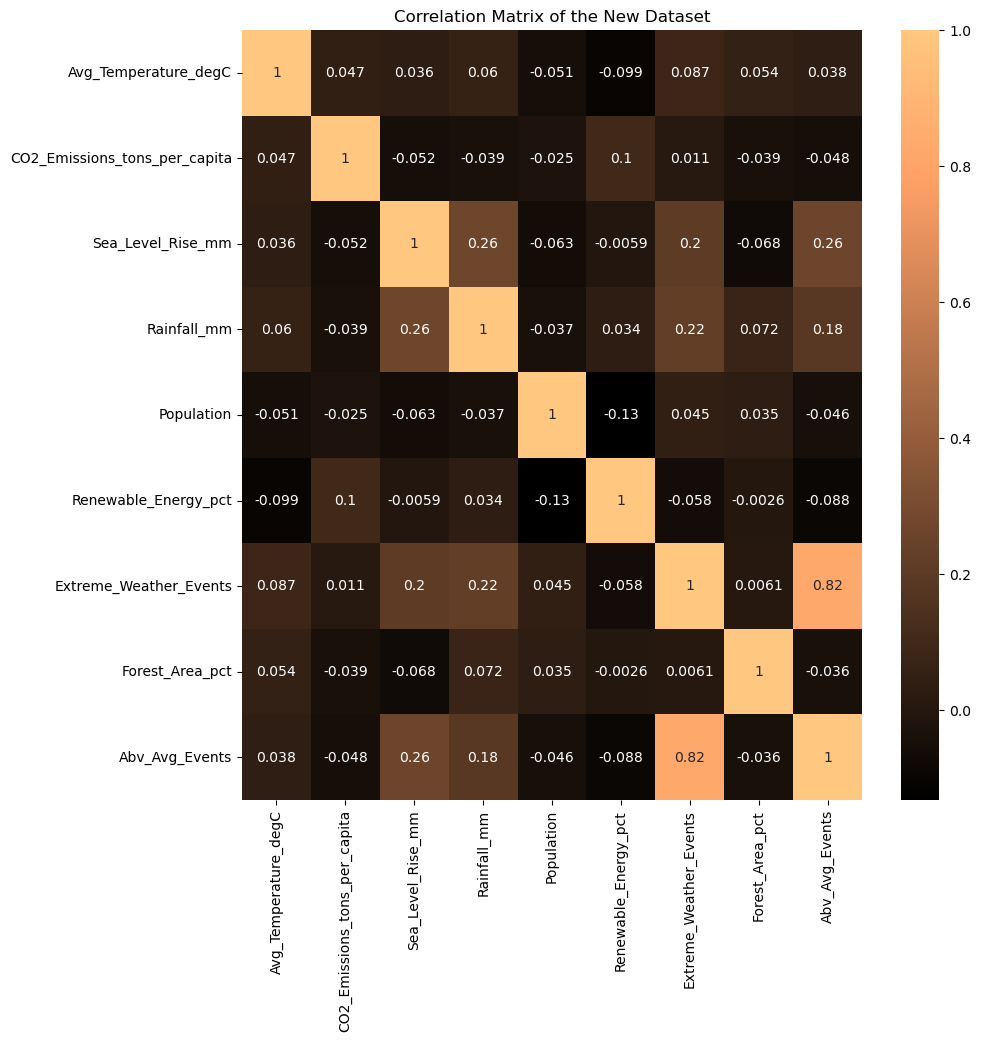

In [60]:
plt.figure(figsize=(10,10))

# create a heatmap for the correlation matrix of numerical variables in this new dataset
sns.heatmap(df_new[['Avg_Temperature_degC','CO2_Emissions_tons_per_capita','Sea_Level_Rise_mm','Rainfall_mm','Population','Renewable_Energy_pct','Extreme_Weather_Events','Forest_Area_pct','Abv_Avg_Events']].corr(), annot=True, cmap='copper')
plt.title("Correlation Matrix of the New Dataset") 

plt.savefig("proj2_heatmap2.png")

plt.show()

**Interpretation:**
* Overall, there is very weak correlation between the climate change variables
* The strongest **positive** correlations are:
    * Extreme_Weather_Events and Abv_Avg_Events (**0.82**)
    * Rainfall_mm and Sea_Level_Rise_mm (**0.26**)
    * Ab_Avg_Events and Sea_Level_Rise_mm (**0.26**)
    * Extreme_Weather_Events and Rainfall_mm (**0.22**)
    * Extreme_Weather_Events and Sea_Level_Rise_mm (**0.22**)
    * Ab_Avg_Events and Rainfall_mm (**0.18**)
* The strongest **negative** correlation is:
    * Renewable_Energy_pct and Population (**-0.13**)
 
**Why it matters:**
* Disregarding the (0.82) correlation because it indicates a relationship between the same variable,
* **There seems to be a common positive correlation between Rainfall, Sea Level Rise, and Extreme Weather Events.** This would mean that when one increases, the others also increase and vise vera.
* The negative correlation between Renewable Energy and Population would mean that they have a slight relationship of inverse variation. When Population increases, Renweable Energy decreases and vise versa.

---

#### We can create a scatterplot to see what the distribution of the data reveals about the relationships between rises in sea level, rainfall, and extreme weather events.

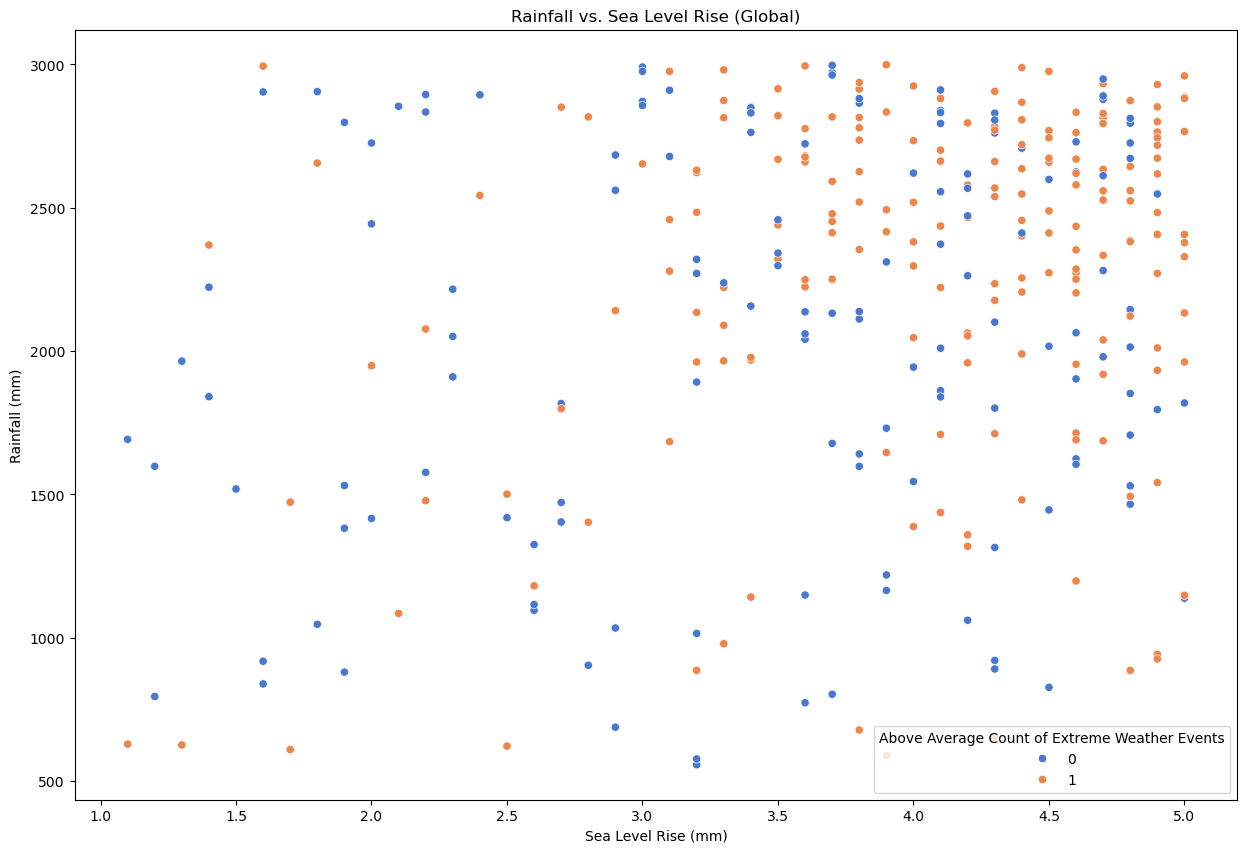

In [65]:
plt.figure(figsize=(15,10))

#sns.scatterplot creates a scatterplot of the data. define x, y, and the data source to generate a graph
# setting the hue to Abv_Avg_Events will color the data points based on the new binary feature
sns.scatterplot(x='Sea_Level_Rise_mm', y='Rainfall_mm', data=df_new, hue='Abv_Avg_Events',palette='muted')

plt.title('Rainfall vs. Sea Level Rise (Global)') 
plt.ylabel('Rainfall (mm)')
plt.xlabel('Sea Level Rise (mm)')

# add a legend to explain the colors for the viewer
plt.legend(title='Above Average Count of Extreme Weather Events')

plt.savefig("proj2_scatter2.png")

plt.show()

**Interpretation:**
* The scatterplot points are spread throughout the graph with a **relatively weak pattern** 
* The plot points are most **concentrated to the upper right of the graph**, being the maximum of both the x-axis and y-axis.
* Plot points indicating an above average count of extreme weather events are evenly distributed throughout the graph as well, though they most clearly cluster at the top right of the graph.

**Why it matters:**
* While there is a clear upward trend, the plot points are still considerably distributed throughout the graph with a lack of linearity that is more visible with the line of best fit.
* **This means that Rainfall, and Sea Level Rise, and Extreme Weather Events more indirectly affect each other.** Conversely, if there were to be a staight line, it would indicate a direct variation between the two variables.
* **For example:** This could be due to the dynamic of how when the sea gets hotter and the sea level rises, causing more evaporation and moisture in the air, more rain clouds form, resulting in an increase in rainfall. Extreme weather could be included in the result of this deviation from the average climate.

---

#### Let's test out this interpretation of the scatterplot with a line of best fit.

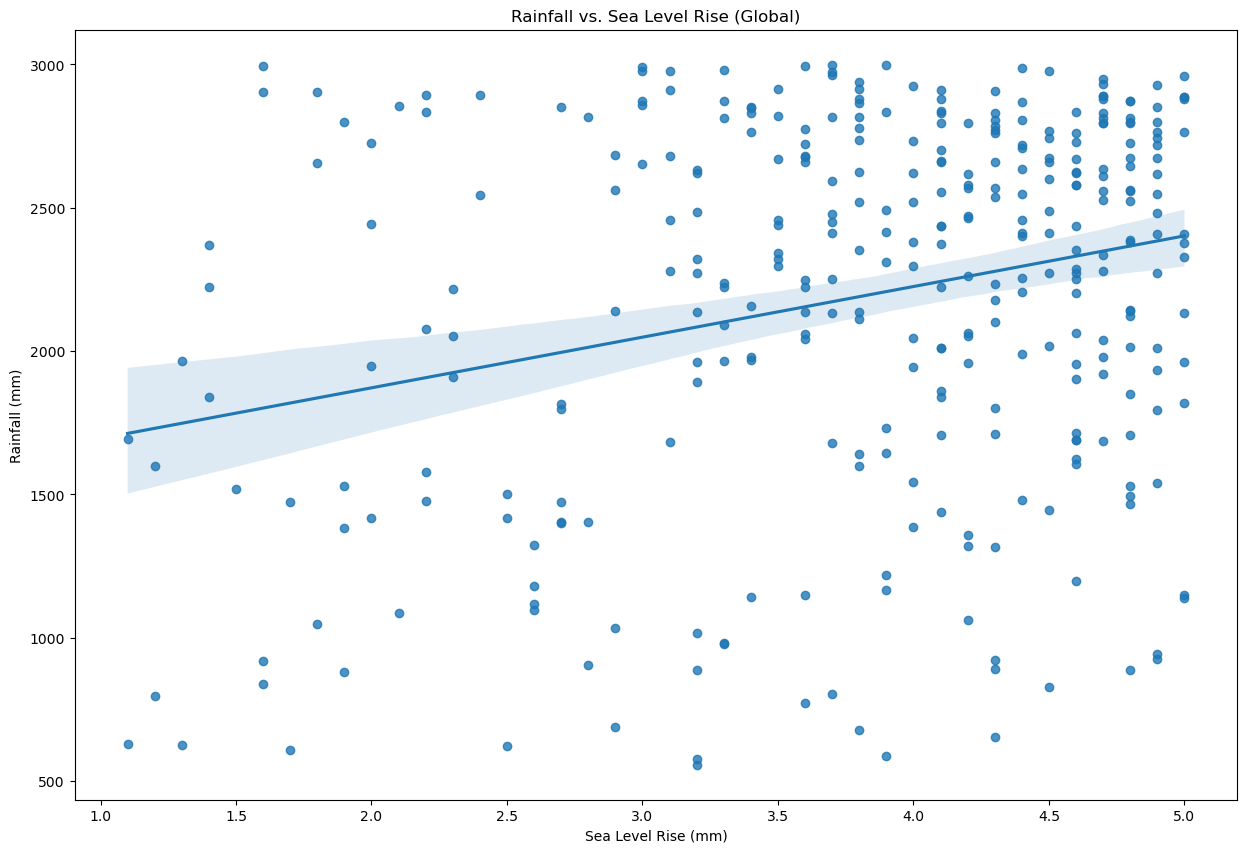

In [70]:
plt.figure(figsize=(15,10))
# sns.regplot uses a logistic model to clearly define and visualize the trend of the distribution
sns.regplot(x='Sea_Level_Rise_mm', y='Rainfall_mm', data=df_new) # set x, y, and the data source

plt.title('Rainfall vs. Sea Level Rise (Global)')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Sea Level Rise (mm)')

plt.savefig("proj2_scatter3.png")

plt.show()

**Interpretation:**
* **The line of best fit helps to illustrate the upward trend of the graph.**

**Why it matters:**
* It can be difficult to analyze a scatterplot graph when the distribution of plot points does not have a strong linear pattern. This does not mean, however, that there is no meaning to extract from it.
* **We can confirm from this that rainfall, sea level rise, and extreme weather events have a slightly positive correlation to each other.**

---

#### **Section II Summary:** 
The variables have a more indirect correlation to each other. This occurs both on the basis of the globe and individual countries. This is evident in the scatterplots of variables with the most correlation that display upward and downward trends, but a lack of linearity. In this way, this dataset gives the most insight when comparing the average data between different countries, or looking at the changes in data over time for a specific country.

---

Save the the updated dataframe to a new .csv file:

In [556]:
df_new.to_csv('temperature_cleaned2.csv')